## Importing the Dataset

In [23]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Admin\Desktop\Road_Accident.csv')
df

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,Male,Unknown,Employee,2-5yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,No distancing,2
12312,Unknown,Male,Elementary school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,No distancing,2
12313,Over 51,Male,Junior high school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Changing lane to the right,1
12314,18-30,Female,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Driving under the influence of drugs,2


## Data Information

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age_band_of_driver       12316 non-null  object
 1   Sex_of_driver            12316 non-null  object
 2   Educational_level        12316 non-null  object
 3   Vehicle_driver_relation  12316 non-null  object
 4   Driving_experience       12316 non-null  object
 5   Lanes_or_Medians         12316 non-null  object
 6   Types_of_Junction        12316 non-null  object
 7   Road_surface_type        12316 non-null  object
 8   Light_conditions         12316 non-null  object
 9   Weather_conditions       12316 non-null  object
 10  Type_of_collision        12316 non-null  object
 11  Vehicle_movement         12316 non-null  object
 12  Pedestrian_movement      12316 non-null  object
 13  Cause_of_accident        12316 non-null  object
 14  Accident_severity        12316 non-nul

## Dropping the unwanted columns

In [2]:
df = df.drop(['Age_band_of_driver','Types_of_Junction','Vehicle_movement','Educational_level','Vehicle_driver_relation','Lanes_or_Medians','Pedestrian_movement'],axis = 'columns')
df.head()

,Sex_of_driver,Driving_experience,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Cause_of_accident,Accident_severity
0,Male,1-2yr,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Moving Backward,2
1,Male,Above 10yr,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Overtaking,2
2,Male,1-2yr,Asphalt roads,Daylight,Normal,Collision with roadside objects,Changing lane to the left,1
3,Male,5-10yr,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Changing lane to the right,2
4,Male,2-5yr,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Overtaking,2


##  Data Visualization

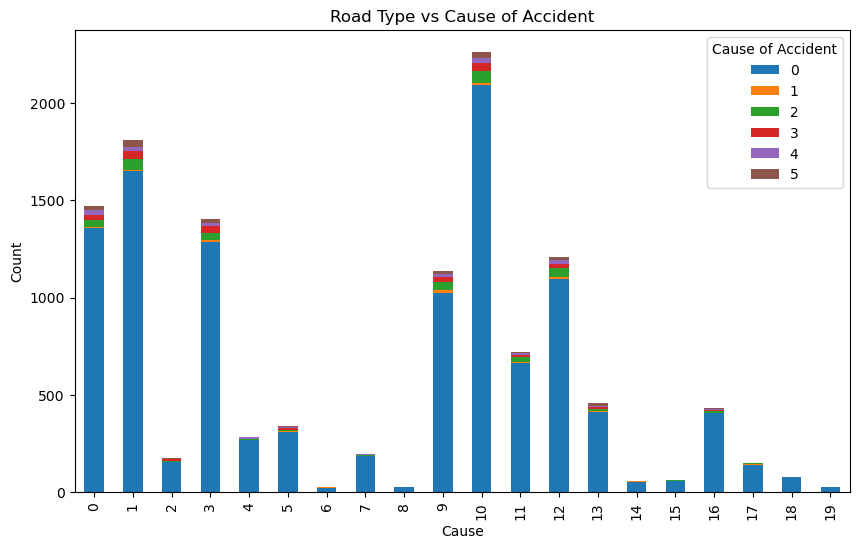

In [6]:
import matplotlib.pyplot as plt

df = df.groupby(['Cause_of_accident', 'Road_surface_type']).size().unstack(fill_value=0)

df.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Cause')

plt.ylabel('Count')

plt.title('Road Type vs Cause of Accident')

plt.legend(title='Cause of Accident')

plt.show()


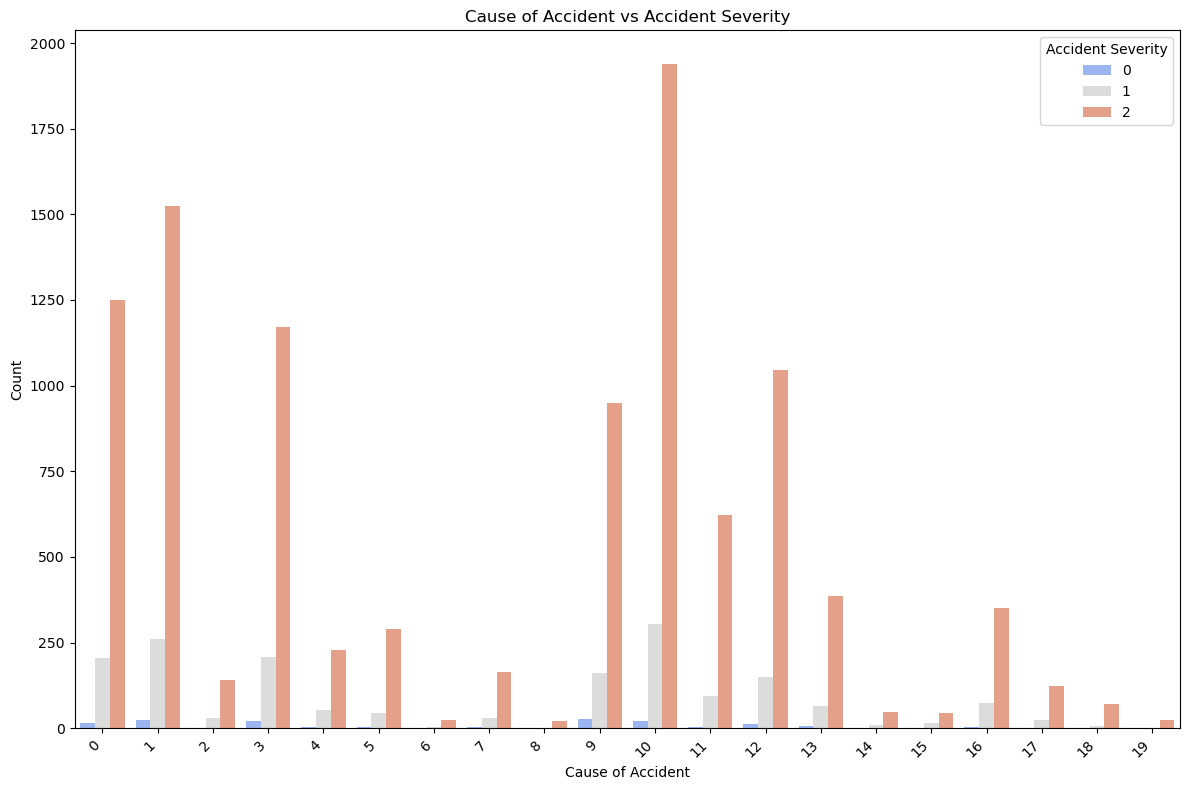

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

sns.countplot(x='Cause_of_accident', hue='Accident_severity', data=df, palette='coolwarm')

plt.title('Cause of Accident vs Accident Severity')

plt.xlabel('Cause of Accident')

plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.legend(title='Accident Severity')

plt.tight_layout()

plt.show()


##  Data Preprocessing Using Encoding

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [4]:
dfle = df

dfle['Driving_experience'] = le.fit_transform(df['Driving_experience'])

dfle['Cause_of_accident'] = le.fit_transform(df['Cause_of_accident'])

dfle['Sex_of_driver'] = le.fit_transform(df['Sex_of_driver'])

dfle['Road_surface_type'] = le.fit_transform(df['Road_surface_type'])

dfle['Light_conditions'] = le.fit_transform(df['Light_conditions'])

dfle['Weather_conditions'] = le.fit_transform(df['Weather_conditions'])

dfle['Type_of_collision'] = le.fit_transform(df['Type_of_collision'])

dfle.head()

,Sex_of_driver,Driving_experience,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Cause_of_accident,Accident_severity
0,1,0,0,3,2,3,9,2
1,1,3,0,3,2,8,16,2
2,1,0,0,3,2,2,0,1
3,1,2,2,0,2,8,1,2
4,1,1,0,0,2,8,16,2


In [7]:
X = dfle[['Sex_of_driver','Road_surface_type','Weather_conditions','Type_of_collision','Cause_of_accident']].values

X

array([[ 1,  0,  2,  3,  9],
       [ 1,  0,  2,  8, 16],
       [ 1,  0,  2,  2,  0],
       ...,
       [ 1,  0,  2,  8,  1],
       [ 0,  0,  2,  8,  5],
       [ 1,  0,  2,  8,  1]])

In [9]:
Y = dfle['Accident_severity']
Y

0        2
1        2
2        1
3        2
4        2
        ..
12311    2
12312    2
12313    1
12314    2
12315    2
Name: Accident_severity, Length: 12316, dtype: int64

## Using OneHotEncoder

In [10]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [11]:
X = ohe.fit_transform(X).toarray()
X

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [12]:
X = X[:,1:]
X

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

## Model Building

In [14]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Features = X 

Target = Y

X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


print("\nClassification Report:")

print(classification_report(y_test, y_pred))

Accuracy: 0.833198051948052

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.15      0.01      0.01       363
           2       0.84      0.99      0.91      2064

    accuracy                           0.83      2464
   macro avg       0.33      0.33      0.31      2464
weighted avg       0.72      0.83      0.76      2464



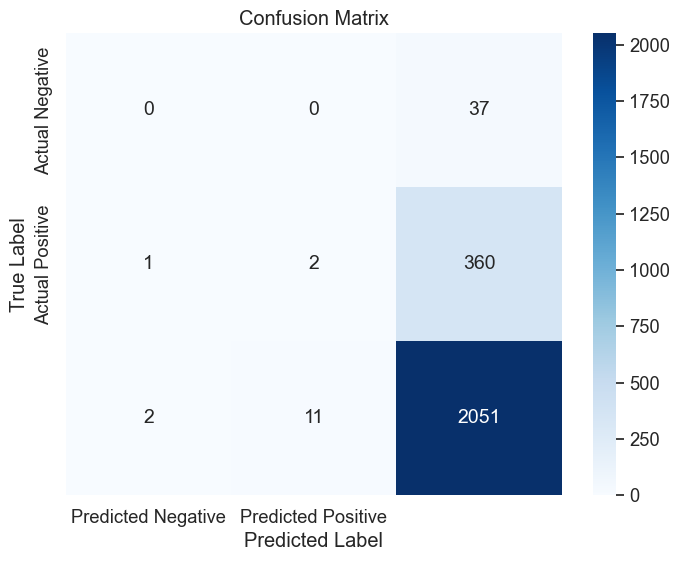

In [19]:
import seaborn as sns

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))

sns.set(font_scale=1.2)  

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14}, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted Label')

plt.ylabel('True Label')

plt.title('Confusion Matrix')

plt.show()
